In [1]:
from scipy import ndimage,misc
import numpy as np
from PIL import Image
from skimage import io,color
from skimage.feature import corner_harris, corner_subpix, corner_peaks
from skimage.transform import warp, AffineTransform
from matplotlib import pyplot as plt
import cv2
%matplotlib inline

In [2]:
jpg1 = Image.open("/Users/RayLJazz/Dropbox/UCDavis/2016summer/DSG/roof_images/44594286.jpg")
jpg2 = Image.open("/Users/RayLJazz/Dropbox/UCDavis/2016summer/DSG/roof_images/-1937877.jpg")
jpg3 = Image.open("/Users/RayLJazz/Dropbox/UCDavis/2016summer/DSG/roof_images/-1304053.jpg")
jpg4 = Image.open("/Users/RayLJazz/Dropbox/UCDavis/2016summer/DSG/roof_images/-1191173.jpg")
#print jpgfile.bits, jpgfile.size, jpgfile.format

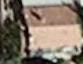

In [3]:
jpg1

In [4]:
jpg1.bits, jpg1.size

(8, (83, 64))

In [5]:
jpg1_array = io.imread("/Users/RayLJazz/Dropbox/UCDavis/2016summer/DSG/roof_images/44594286.jpg")

In [6]:
jpg1_array.shape

(64, 83, 3)

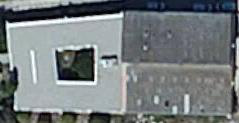

In [7]:
jpg2

In [8]:
jpg2.bits, jpg2.size

(8, (239, 123))

In [9]:
jpg2_array = io.imread("/Users/RayLJazz/Dropbox/UCDavis/2016summer/DSG/roof_images/-1937877.jpg")

In [10]:
jpg2_array.shape

(123, 239, 3)

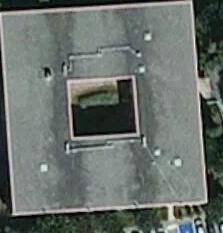

In [11]:
jpg3

In [12]:
jpg3.bits, jpg3.size

(8, (223, 233))

In [13]:
jpg3_array = io.imread("/Users/RayLJazz/Dropbox/UCDavis/2016summer/DSG/roof_images/-1304053.jpg")

In [14]:
jpg3_array.shape

(233, 223, 3)

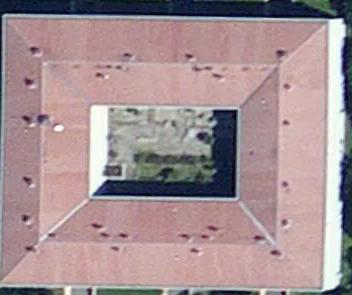

In [15]:
jpg4

In [16]:
jpg4.bits, jpg4.size

(8, (352, 295))

In [17]:
jpg4_array = io.imread("/Users/RayLJazz/Dropbox/UCDavis/2016summer/DSG/roof_images/-1191173.jpg")

In [18]:
jpg4_array.shape

(295, 352, 3)

#  Corner detection

In [19]:
dirct = '/Users/RayLJazz/Dropbox/UCDavis/2016summer/DSG/Github/data/processed/grey_resized_images/'
img1_id = 'grey_resized_44594286.png'
img2_id = 'grey_resized_-1937877.png'
img3_id = 'grey_resized_-1304053.png'
img4_id = 'grey_resized_-1191173.png'

In [20]:
img1 = cv2.imread(dirct+img1_id)
img2 = cv2.imread(dirct+img2_id)
img3 = cv2.imread(dirct+img3_id)
img4 = cv2.imread(dirct+img4_id)

In [21]:
#http://scikit-image.org/docs/stable/auto_examples/features_detection/plot_corner.html#example-features-detection-plot-corner-py
from skimage import data
from skimage.feature import corner_harris, corner_subpix, corner_peaks
from skimage.transform import warp, AffineTransform
from skimage.draw import ellipse

In [22]:
def corner_detection(image_array_color):
    image=color.rgb2gray(image_array_color)
    coords = corner_peaks(corner_harris(image), min_distance=1.5)
    coords_subpix = corner_subpix(image, coords, window_size=13)

    fig, ax = plt.subplots()
    ax.imshow(image, interpolation='nearest', cmap=plt.cm.gray)
    ax.plot(coords[:, 1], coords[:, 0], '*r', markersize=15)
    ax.plot(coords_subpix[:, 1], coords_subpix[:, 0], '*b', markersize=15)
    axis_num=np.zeros((1,4))
    axis_num[0][2]=image.shape[0]
    axis_num[0][1]=image.shape[1]
    ax.axis(axis_num[0])
    plt.show()    

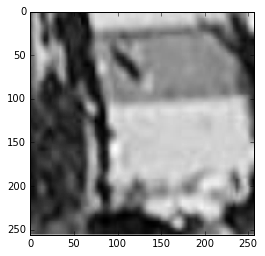

In [23]:
corner_detection(img1)

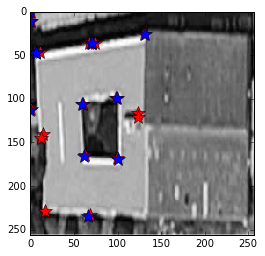

In [24]:
corner_detection(img2)

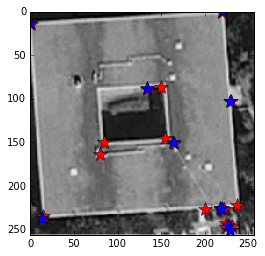

In [25]:
corner_detection(img3)

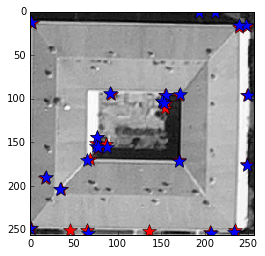

In [26]:
corner_detection(img4)

# Detecting Edges

In [27]:
img1_gray = cv2.imread(dirct+img1_id, cv2.IMREAD_GRAYSCALE)
img2_gray = cv2.imread(dirct+img2_id, cv2.IMREAD_GRAYSCALE)
img3_gray = cv2.imread(dirct+img3_id, cv2.IMREAD_GRAYSCALE)
img4_gray = cv2.imread(dirct+img4_id, cv2.IMREAD_GRAYSCALE)

In [28]:
def detect_edges(img):
    rows, cols = img.shape
    #sobel_horizontal = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
    #sobel_vertical = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
    laplacian = cv2.Laplacian(img, cv2.CV_64F)
    canny = cv2.Canny(img, 150, 150)#smaller, more
    plt.figure(1)
    plt.subplot(121)
    plt.imshow(laplacian,cmap='Greys_r')
    plt.title('Laplacian')
    plt.subplot(122)
    plt.imshow(canny,cmap='Greys_r')
    plt.title('Canny')
    #cv2.startWindowThread()
    #cv2.imshow('laplacian',laplacian)
    #cv2.waitKey()
    #cv2.imshow('Sobel horizontal', sobel_horizontal)
    #cv2.imshow('Sobel vertical', sobel_vertical)

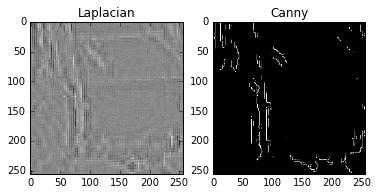

In [29]:
detect_edges(img1_gray)

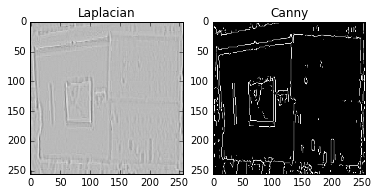

In [30]:
detect_edges(img2_gray)

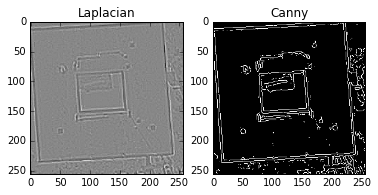

In [31]:
detect_edges(img3_gray)

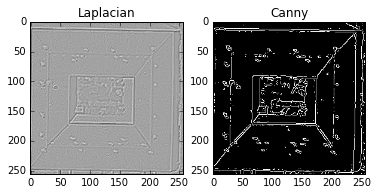

In [32]:
detect_edges(img4_gray)

# Detecting the corners

In [33]:
def detect_corner(gray):
    gray = np.float32(gray)
    color = cv2.cvtColor(gray,cv2.cv.CV_GRAY2RGB)
    dst = cv2.cornerHarris(gray, 4,5, 0.04) # to detect only sharp corners
    # Result is dilated for marking the corners
    dst = cv2.dilate(dst,None)
    print dst.shape
    # Threshold for an optimal value, it may vary depending on the image.
    color[dst > 0.01*dst.max()] = [0,0,0]
    plt.figure(1)
    plt.subplot(121)
    plt.imshow(dst,cmap='Greys_r')
    plt.title('Harris Corners')
    plt.subplot(122)
    plt.imshow(color,cmap='Greys_r')
    plt.title('Harris Corners_Original_Image')

(256, 256)


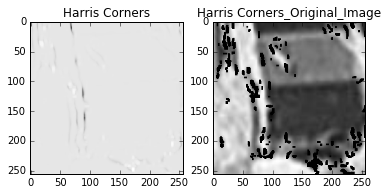

In [34]:
detect_corner(img1_gray)

(256, 256)


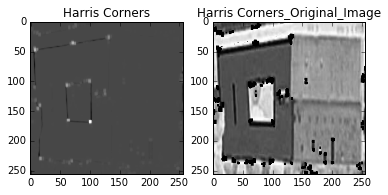

In [35]:
detect_corner(img2_gray)

(256, 256)


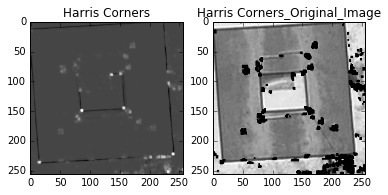

In [36]:
detect_corner(img3_gray)

(256, 256)


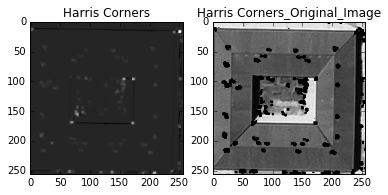

In [37]:
detect_corner(img4_gray)

# Good Features To Track--improve corner

In [38]:
def detect_corner_improve(gray):
    gray = np.float32(gray)
    color = cv2.cvtColor(gray,cv2.cv.CV_GRAY2RGB)
    corners = cv2.goodFeaturesToTrack(gray, 7, 0.05, 25)
    corners = np.float32(corners)
    print corners.shape
    for item in corners:
        x, y = item[0]
        cv2.circle(color, (x,y), 5, 255, -1)
    plt.imshow(color,cmap='Greys_r')
    plt.title('Harris Corners_Original_Image')

(7, 1, 2)


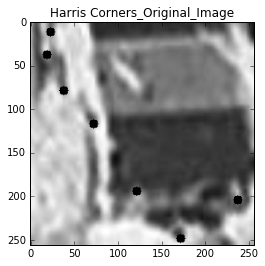

In [39]:
detect_corner_improve(img1_gray)

(7, 1, 2)


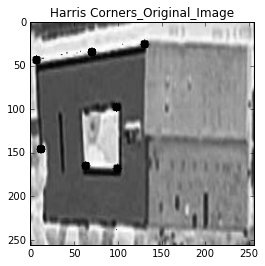

In [40]:
detect_corner_improve(img2_gray)

(7, 1, 2)


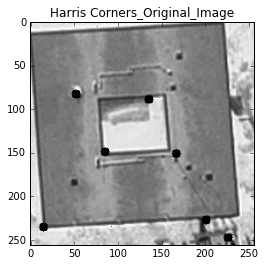

In [41]:
detect_corner_improve(img3_gray)

(7, 1, 2)


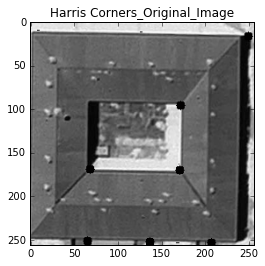

In [42]:
detect_corner_improve(img4_gray)

# detect roof

In [22]:
from matplotlib.patches import Rectangle
from sklearn_theano.datasets import load_sample_image
from sklearn_theano.feature_extraction import OverfeatLocalizer
from sklearn_theano.feature_extraction import get_all_overfeat_labels

/Users/RayLJazz/miniconda3/envs/python2/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [23]:
def convert_points_to_box(points, color, alpha):
    upper_left_point = (points[:, 0].min(), points[:, 1].min())
    width = points[:, 0].max() - points[:, 0].min()
    height = points[:, 1].max() - points[:, 1].min()
    return Rectangle(upper_left_point, width, height, ec=color,
                     fc=color, alpha=alpha)

In [45]:
sloth_label = [label for label in get_all_overfeat_labels()
               if 'roof' in label][0]
sloth_label

'tile roof'

In [36]:
X = jpg4_array
sloth_label = [label for label in get_all_overfeat_labels()
               if 'roof' in label][0]
clf = OverfeatLocalizer(match_strings=[sloth_label])

sloth_points = clf.predict(X)[0]
sloth_box = convert_points_to_box(sloth_points, 'orange', .4)

plt.imshow(X)
ax = plt.gca()
ax.autoscale(enable=False)
ax.add_patch(sloth_box)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
plt.show()

ValueError: zero-size array to reduction operation minimum which has no identity

In [24]:
from sklearn_theano.feature_extraction import GoogLeNetClassifier
from sklearn_theano.feature_extraction import OverfeatClassifier

Downloading: /Users/RayLJazz/sklearn_theano_data/caffe/bvlc_googlenet/bvlc_googlenet.caffemodel Bytes: 53533754
  10000000  [18.68%]
  20000000  [37.36%]
  30000000  [56.04%]
  40000000  [74.72%]
  50000000  [93.40%]
  53533754  [100.00%]


/Users/RayLJazz/miniconda3/envs/python2/lib/python2.7/site-packages/sklearn_theano/feature_extraction/caffe/caffemodel.py:164: UserWarning: Caching parse for caffemodel, this may take some time
  warnings.warn("Caching parse for caffemodel, this may take some time")


('Overfeat predictions', array([['otter', 'meerkat, mierkat', 'Border terrier', 'badger',
        'three-toed sloth, ai, Bradypus tridactylus']], dtype=object))
('Overfeat probabilities', array([[  2.14524093e-07,   1.34062088e-06,   7.87418139e-06,
          1.31270019e-04,   9.99858141e-01]], dtype=float32))
('GoogLeNet predictions', array([['otter', 'African grey, African gray, Psittacus erithacus',
        'badger', 'sea lion', 'three-toed sloth, ai, Bradypus tridactylus']], dtype=object))
('GoogLeNet probabilities', array([[ 0.0191794 ,  0.027279  ,  0.03366539,  0.04920721,  0.76793534]], dtype=float32))


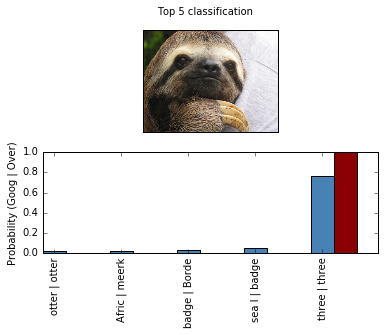

In [40]:
X = load_sample_image("sloth_closeup.jpg")
top_n_classes = 5
goog_clf = GoogLeNetClassifier(top_n=top_n_classes)
over_clf = OverfeatClassifier(top_n=top_n_classes)
goog_preds = goog_clf.predict(X)
over_preds = over_clf.predict(X)
goog_probs = goog_clf.predict_proba(X)
over_probs = over_clf.predict_proba(X)
f, axarr = plt.subplots(2, 1)
plt.suptitle("Top %i classification" % top_n_classes)
axarr[0].imshow(X)
axarr[0].autoscale(enable=False)
axarr[0].get_xaxis().set_ticks([])
axarr[0].get_yaxis().set_ticks([])
ind = np.arange(top_n_classes)
width = .35
axarr[1].bar(ind, goog_probs.ravel(), width, color='steelblue')
axarr[1].bar(ind + width, over_probs.ravel(), width, color='darkred')
# Just make the array, then we will fill it correctly
print("Overfeat predictions", over_preds)
print("Overfeat probabilities", over_probs)
print("GoogLeNet predictions", goog_preds)
print("GoogLeNet probabilities", goog_probs)
labels = goog_preds.ravel()
for n in range(len(labels.flat)):
    labels[n] = goog_preds.flat[n][:5] + " | " + over_preds.flat[n][:5]
axarr[1].set_xticks(ind + width / 2)
axarr[1].set_xticklabels(labels, rotation='vertical')
axarr[1].set_ylabel("Probability (Goog | Over)")
plt.show()

In [42]:
goog_clf,goog_preds

(GoogLeNetClassifier(large_network=False, output_strings=True, top_n=5,
           transpose_order=(0, 3, 1, 2)),
 array([['otter | otter', 'Afric | meerk', 'badge | Borde', 'sea l | badge',
         'three | three']], dtype=object))

# Extract CNN layers

In [26]:
from sklearn_theano.datasets import fetch_asirra
from sklearn_theano.feature_extraction import OverfeatTransformer

In [35]:
asirra = fetch_asirra()
X = asirra.images.astype('float32')

In [36]:
X_small = X[0:5]

In [60]:
X_small.type()

AttributeError: 'numpy.ndarray' object has no attribute 'type'

In [44]:
X_small.shape

(5, 231, 231, 3)

In [46]:
y = asirra.target

In [49]:
y_small = y[0:5]

In [50]:
y_small.shape

(5,)

In [55]:
for i in range(1, 2):
    tf = OverfeatTransformer(output_layers=[i])
    X_tf = tf.transform(X_small)
    print("Shape of layer %i output" % i)
    print(X_tf.shape)

Shape of layer 1 output
(5, 301056)


In [57]:
def CNN_feature(layer,X):
    tf = OverfeatTransformer(output_layers=[layer])
    X_tf = tf.transform(X)
    print(X_tf.shape)

In [58]:
CNN_feature(1,X)

(1000, 301056)
